In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

d:\python workspace\Machine_Leaning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import kagglehub
path = kagglehub.dataset_download("adilshamim8/student-performance-on-an-entrance-examination")

print("Path to dataset files:", path)
dataset = load_dataset(path)

Path to dataset files: C:\Users\anshp\.cache\kagglehub\datasets\adilshamim8\student-performance-on-an-entrance-examination\versions\1


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation', 'time', 'Performance'],
        num_rows: 666
    })
})

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = dataset['train']
input = data.remove_columns('Performance') #Removing the performance values as they are just there to check the accuracy
target = data['Performance']
y = pd.DataFrame(target).apply(le.fit_transform)
X = pd.DataFrame(input).apply(le.fit_transform)
X = np.asarray(X[['Gender','Caste','coaching','Class_ten_education','medium','Class_X_Percentage','Class_XII_Percentage','Father_occupation', 'Mother_occupation', 'time']])
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.15,random_state=21)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
661,0
662,0
663,0
664,0


In [26]:
from sklearn.tree import DecisionTreeClassifier
myModel=DecisionTreeClassifier(max_features=15,max_leaf_nodes=10)
model = myModel.fit(xTrain,yTrain)
predictions = model.predict(xTest)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
myModel=AdaBoostClassifier()
model = myModel.fit(xTrain,yTrain)
predictions = model.predict(xTest)

d:\python workspace\Machine_Leaning\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.ensemble import RandomForestClassifier
myModel=RandomForestClassifier(criterion="entropy",max_features="log2")
model = myModel.fit(xTrain,yTrain)
predictions = model.predict(xTest)

d:\python workspace\Machine_Leaning\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [17]:
from xgboost import XGBClassifier
myModel=XGBClassifier(learning_rate=0.01)
model=myModel.fit(xTrain,yTrain)
predictions=model.predict(xTest)

In [27]:
yTestval = yTest.iloc[:,0]
yTestval.values, predictions

(array([3, 3, 0, 3, 0, 0, 0, 3, 2, 0, 3, 3, 2, 3, 1, 1, 0, 0, 0, 0, 2, 3,
        2, 2, 2, 0, 3, 0, 1, 2, 2, 3, 2, 1, 0, 2, 2, 0, 3, 3, 3, 0, 2, 0,
        3, 2, 0, 0, 3, 2, 0, 3, 3, 3, 0, 2, 1, 1, 1, 2, 1, 0, 3, 3, 3, 3,
        2, 2, 3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 3, 3,
        1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 3, 1]),
 array([3, 3, 0, 2, 0, 0, 0, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 2, 0, 0, 1, 2,
        3, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 1, 2, 0, 1, 0, 3, 3, 3, 0, 2, 0,
        3, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 2, 1, 1, 1, 3, 0, 2, 3, 2, 3,
        2, 2, 1, 2, 3, 1, 3, 2, 2, 1, 0, 2, 1, 0, 0, 3, 3, 1, 3, 2, 2, 2,
        1, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2]))

In [28]:
rights=0
accuracy_score = list()
for i in range(len(predictions)):
    if predictions[i] == yTestval.values[i]:
        rights = rights+1
    accuracy=rights/(i+1)
    accuracy_score.append(accuracy)
print(accuracy*100)

56.00000000000001


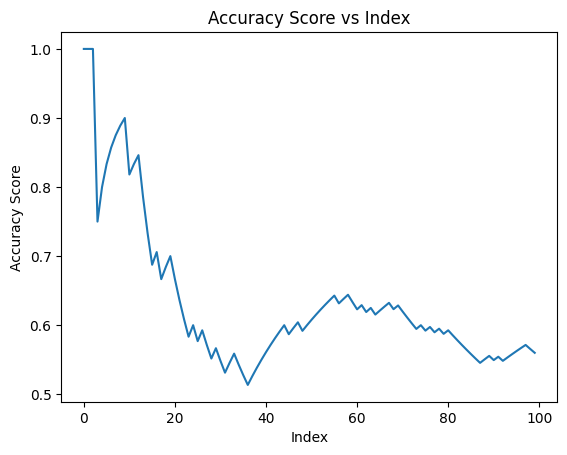

In [29]:
plt.plot(range(len(accuracy_score)), accuracy_score)
plt.xlabel('Index')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Index')
plt.show()